 <div class="alert alert-block alert-info" style="margin-top: 20px">
    
<h1 align=center><font size = 5> Uber Review Analysis </h1>
</div>

In [80]:
# Import Libraries
import pandas as pd
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Import data </h1>

In [82]:
# Load the dataset
df = pd.read_csv("uber_reviews_data.csv")
df.head()

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,User_0,Good,5,0,4.556.10005,12/18/2024 17:17,NaN,NaN,4.556.10005
1,User_1,Nice,5,0,4.556.10005,12/18/2024 17:17,NaN,NaN,4.556.10005
2,User_2,Very convenient,5,0,4.532.10001,12/18/2024 17:09,NaN,NaN,4.532.10001
3,User_3,Good,4,0,4.556.10005,12/18/2024 17:08,NaN,NaN,4.556.10005
4,User_4,exllence,5,0,4.556.10005,12/18/2024 17:08,NaN,NaN,4.556.10005


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Data Cleaning </h1>

In [83]:
# Check for missing values
print(df.isnull().sum())

userName                    0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion     1740
at                          0
replyContent            11967
repliedAt               11967
appVersion               1740
dtype: int64


In [84]:
# Drop rows with missing review content
df = df.dropna(subset=['content'])
# Drop replyContent and repliedAt (mostly missing data)
df = df.drop(columns=['replyContent', 'repliedAt'])
df

,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,User_0,Good,5,0,4.556.10005,12/18/2024 17:17,4.556.10005
1,User_1,Nice,5,0,4.556.10005,12/18/2024 17:17,4.556.10005
2,User_2,Very convenient,5,0,4.532.10001,12/18/2024 17:09,4.532.10001
3,User_3,Good,4,0,4.556.10005,12/18/2024 17:08,4.556.10005
4,User_4,exllence,5,0,4.556.10005,12/18/2024 17:08,4.556.10005
...,...,...,...,...,...,...,...
11995,User_11995,Excellent!!!,5,0,4.553.10000,11/24/2024 21:59,4.553.10000
11996,User_11996,Worst experience after 10pm in Hyde cityno aut...,5,0,4.552.10000,11/24/2024 21:56,4.552.10000
11997,User_11997,Exceptional,5,0,4.552.10000,11/24/2024 21:52,4.552.10000
11998,User_11998,Good Service.,5,0,4.553.10000,11/24/2024 21:50,4.553.10000


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Explore Data </h1>

In [85]:
df.shape

(12000, 7)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


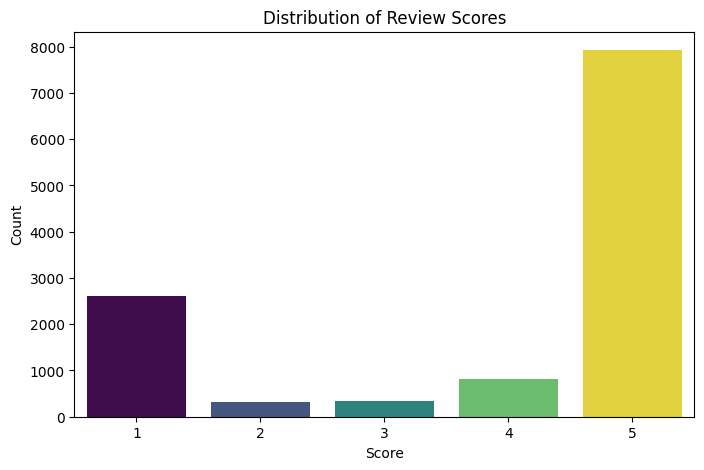

In [86]:
# Explore the date
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
# Download necessary NLTK data
nltk.download('stopwords')

# Distribution of Scores
def plot_score_distribution(df, score_col='score'):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=score_col, hue=score_col, palette='viridis', legend=False)
    plt.title('Distribution of Review Scores')
    plt.xlabel('Score')
    plt.ylabel('Count')
    plt.show()
plot_score_distribution(df)

In [87]:
# Most Liked Reviews (Top 5)
def show_most_liked_reviews(df, content_col='content', likes_col='thumbsUpCount', top_n=5):
    top_reviews = df.sort_values(by=likes_col, ascending=False).head(top_n)
    for i, row in top_reviews.iterrows():
        print(f"\n[{row[likes_col]}] {row[content_col]}\n")
show_most_liked_reviews(df)


[239] Worst app and membership program ever. Customer service is useless, and if you have a problem with any of your food items, don't think they will refund or replace anything. They charge you randomly and more than they are supposed to. When I went to cancel my uber one membership,they convinced me to keep it and charge me $1.99 for the next 3 months, so I kept it. Days later I was charged $3.00 and then $9.99 again. Customer service told me it was a pending charge and would not go through but nope


[171] It is very difficult to make contact regarding a driver or an issue. Can't you make this app easier to navigate with a subtitle or such so one can tap & it gives a direct area to write a problem to you instead of tapping on one area then open that area up and tap on another and so forth just to get to the help one needs. Please make your app senior friendly! I depend on you for rides. Thank you.


[169] I will now be using Bolt instead of Uber. On 23 May 2023 I attempted to reque

In [88]:
# Common Words per Rating Group
def show_common_words(df, content_col='content', score_col='score', top_n=5):
    stop_words = set(stopwords.words('english'))

    grouped = df.groupby(score_col)[content_col].apply(lambda texts: ' '.join(texts))
    for score, text in grouped.items():
        tokens = word_tokenize(text.lower())
        words = [word for word in tokens if word.isalpha() and word not in stop_words]
        word_counts = Counter(words)
        common_words = word_counts.most_common(top_n)
        print(f"\n Score {score}: Top {top_n} Words")
        for word, count in common_words:
            print(f"{word}: {count}")
show_common_words(df)


 Score 1: Top 5 Words
uber: 1249
app: 993
ride: 756
driver: 724
drivers: 498

 Score 2: Top 5 Words
uber: 138
app: 110
ride: 90
driver: 90
drivers: 85

 Score 3: Top 5 Words
uber: 87
app: 87
driver: 77
good: 72
drivers: 69

 Score 4: Top 5 Words
good: 339
app: 100
nice: 88
uber: 76
service: 72

 Score 5: Top 5 Words
good: 2635
nice: 958
service: 930
great: 643
uber: 618


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Text Preprocessing </h1>

In [89]:
# TEXT PREPROCESSING
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english')) # Automatically removes common English words like 'the', 'and', 'is', etc.
lemmatizer = WordNetLemmatizer()

In [90]:
# Full preprocessing: lowercase, clean, tokenize, remove stopwords, lemmatize
# Text preprocessing function
def preprocess_text(text):
    text = text.lower() #convert all in the text into lowercase
    text = re.sub(r'[^a-z\s]', '', text) #keep only lowercase and white spaces
    tokens = word_tokenize(text) #split the text into individual words
    tokens = [t for t in tokens if t not in stop_words] #filter stop words
    tokens = [lemmatizer.lemmatize(t) for t in tokens] #lemmatize words
    return ' '.join(tokens) #convert the list of tokens back into a single string

In [91]:
# Apply preprocessing to DataFrame
df['cleaned_content'] = df['content'].astype(str).dropna().apply(preprocess_text)

# Print the result
df[['content', 'cleaned_content']].head(10)

,content,cleaned_content
0,Good,good
1,Nice,nice
2,Very convenient,convenient
3,Good,good
4,exllence,exllence
5,Michelle was a very friendly and personable pe...,michelle friendly personable person polite
6,Bast price pr car available,bast price pr car available
7,Good service,good service
8,Awesome,awesome
9,Nice 🙂🙂🙂🙂🙂,nice


In [92]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf1 = vectorizer.fit_transform(df['cleaned_content'])

In [93]:
# Clustering
from sklearn.cluster import KMeans

# Choose number of clusters (e.g., 5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init=10 to avoid future warnings
kmeans.fit(X_tfidf1)

# Add cluster labels to DataFrame
df['cluster'] = kmeans.labels_
import numpy as np

def get_top_keywords(model, feature_names, n=10):
    for i, center in enumerate(model.cluster_centers_):
        print(f"\nCluster {i}:")
        top_indices = center.argsort()[::-1][:n]
        top_words = [feature_names[idx] for idx in top_indices]
        print(", ".join(top_words))

get_top_keywords(kmeans, vectorizer.get_feature_names_out())


Cluster 0:
driver, excellent, app, uber, ride, best, time, good, experience, service

Cluster 1:
great, service, experience, driver, app, ride, uber, always, trip, friendly

Cluster 2:
good, experience, app, driver, ride, time, uber, behaviour, behavior, rider

Cluster 3:
nice, app, ride, experience, service, trip, driver, person, aap, uber

Cluster 4:
service, good, excellent, best, bad, fast, uber, price, driver, poor


Comments:
1. Too many common words are dominating
Words like "good", "driver", "uber", "ride", "app" appear in almost every cluster — these do not tell what actually differentiates the clusters.

2. TF-IDF alone does not capture sentiment or context
Without extra dimensions like sentiment, it's hard for K-Means to separate "good driver" from "rude driver" — both will include the word "driver".

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Create a New cleaned DataFrame </h1>

In [94]:
import pandas as pd
# Filter out single-word reviews (avoid some comments only have "good" or "bad")
df_cleaned = df[df['cleaned_content'].str.split().str.len() > 1].copy()

# Preview the result
df_cleaned.shape

(8284, 9)

In [95]:
print(f"Before: {df.shape[0]} review sentences")
print(f"After: {df_cleaned.shape[0]} review sentences")
print(f"Dropped: {df.shape[0] - df_cleaned.shape[0]} review sentences")

Before: 12000 review sentences
After: 8284 review sentences
Dropped: 3716 review sentences


In [96]:
df_cleaned[['cleaned_content','score','thumbsUpCount']].tail(10)

,cleaned_content,score,thumbsUpCount
11984,poor service company dont like type service pl...,1,0
11986,company us unethical method pay think paying u...,1,7
11988,vv nice aap,4,0
11991,proffessional sharp time caring client safe dr...,5,0
11992,cant book uber shuttle matter payment gateway use,1,0
11993,easy use,5,0
11994,super exent,5,0
11996,worst experience pm hyde cityno auto taking ride,5,0
11998,good service,5,0
11999,bad experience app booked short ride r unwante...,1,0


In [97]:
# TF-IDF Vectorization
# highlights words that are both important and unique
vectorizer = TfidfVectorizer(max_features=1000)
# keep only the top 1000 most important words based on frequency and uniqueness
X_tfidf = vectorizer.fit_transform(df_cleaned['cleaned_content']) # a spare matrix

In [98]:
X_tfidf.shape

(8284, 1000)

In [99]:
# which words had the highest influence in each review according to TF-IDF in the last 5 sentences
feature_names = vectorizer.get_feature_names_out()
for i in range(X_tfidf.shape[0] - 5, X_tfidf.shape[0]):
    print(f"\nReview {i + 1}:")
    row = X_tfidf[i]
    row_dense = row.toarray().flatten()
    nonzero_indices = row_dense.nonzero()[0]
    for idx in nonzero_indices:
        word = feature_names[idx]
        value = row_dense[idx]
        print(f"  {word}: {value:.4f}")


Review 8280:
  easy: 0.7641
  use: 0.6451

Review 8281:
  super: 1.0000

Review 8282:
  auto: 0.4268
  experience: 0.2783
  pm: 0.5951
  ride: 0.2277
  taking: 0.4666
  worst: 0.3416

Review 8283:
  good: 0.6955
  service: 0.7186

Review 8284:
  added: 0.3482
  also: 0.2354
  app: 0.1346
  application: 0.2833
  bad: 0.2235
  booked: 0.2591
  experience: 0.1746
  fair: 0.3050
  information: 0.3382
  location: 0.2404
  problem: 0.2630
  ride: 0.1428
  short: 0.3255
  without: 0.2659
  worst: 0.2143


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Divide into Negative and Positive Sentiment </h1>

In [100]:
# Map score to sentiment
def label_sentiment(score):
    if score in [1, 2, 3]:
        return 'negative'
    else:
        return 'positive'

df_cleaned.loc[:,'sentiment'] = df_cleaned['score'].apply(label_sentiment)
df_cleaned[['cleaned_content','score','sentiment']].head()

,cleaned_content,score,sentiment
5,michelle friendly personable person polite,5,positive
6,bast price pr car available,5,positive
7,good service,5,positive
10,never using uber europe thry charged twice tri...,1,negative
11,nice app,5,positive


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = vectorizer.fit_transform(df_cleaned['cleaned_content'])
y = df_cleaned['sentiment']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression( solver='saga', max_iter=1000)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.87      0.90      0.88       606
    positive       0.94      0.92      0.93      1051

    accuracy                           0.91      1657
   macro avg       0.90      0.91      0.91      1657
weighted avg       0.91      0.91      0.91      1657



In [102]:
# Sentiment Breakdown
df_cleaned.loc[:,'predicted_sentiment'] = model.predict(vectorizer.transform(df_cleaned['cleaned_content']))
print("\n Overall Sentiment Breakdown:\n")
print(df_cleaned['predicted_sentiment'].value_counts())


 Overall Sentiment Breakdown:

predicted_sentiment
positive    5138
negative    3146
Name: count, dtype: int64


In [103]:
# Split DataFrame into Sentiment groups
df_negative = df_cleaned[df_cleaned['sentiment'] == 'negative']
df_positive = df_cleaned[df_cleaned['sentiment'] == 'positive']

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Analyzing Negative Review </h1>

In [118]:
# Cluster negative reviews
# IF-IDF Vecotorization again
vectorizer_neg = TfidfVectorizer(ngram_range=(1,2), max_features=1000, stop_words='english')
#	Captures both unigrams (e.g., "bad") and bigrams (e.g., "bad driver") for better meaning
X_neg = vectorizer_neg.fit_transform(df_negative['cleaned_content'])

# K-Means to find 3 clusters in the negative reviews
from sklearn.cluster import KMeans
kmeans_neg = KMeans(n_clusters=3, random_state=42)
df_negative.loc[:,'cluster'] = kmeans_neg.fit_predict(X_neg)

In [105]:
# Review top keywords per cluster
def top_terms_per_cluster(kmeans_model, vectorizer, n_terms=10):
    feature_names = vectorizer.get_feature_names_out()
    for i, center in enumerate(kmeans_model.cluster_centers_):
        print(f"\nCluster {i}:")
        top_indices = center.argsort()[::-1][:n_terms]
        print(", ".join([feature_names[j] for j in top_indices]))

top_terms_per_cluster(kmeans_neg, vectorizer_neg)


Cluster 0:
driver, ride, time, uber, cancel, trip, minute, app, wait, waiting

Cluster 1:
uber, app, service, bad, customer, price, use, support, dont, driver

Cluster 2:
worst, worst app, app, worst experience, experience, worst service, driver, time, ride, service


Cluster 0 — Focused on timing and cancellations. (Operational problems)
Customers complain about: Drivers not showing up or being late, Wait times, Trip cancellations

Cluster 1 — Centered on general app and service dissatisfaction. (Service and support issues)
Issues likely related to: Bad app experience, Customer service problems, Possibly pricing and support

Cluster 2 — Strongly emotional complaints with repeated use of "worst". (Emotionally charged complaints)
Most likely very intense negative reviews where users emphasize poor experiences across the board. Suggests extremely dissatisfied users, likely hurting the brand.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Analyzing Positive Review </h1>

In [119]:
# Cluster positive reviews

# IF-IDF Vecotorization again
vectorizer_pos = TfidfVectorizer(ngram_range=(1,2), max_features=1000, stop_words='english')
#	Captures both unigrams (e.g., "good") and bigrams (e.g., "good service") for better meaning
X_pos = vectorizer_pos.fit_transform(df_positive['cleaned_content'])

# ask K-Means to find 3 clusters in the negative reviews
from sklearn.cluster import KMeans
kmeans_pos = KMeans(n_clusters=3, random_state=42)
df_positive.loc[:,'cluster'] = kmeans_pos.fit_predict(X_pos)

# Review top keywords per cluster
def top_terms_per_cluster(kmeans_model, vectorizer, n_terms=10):
    feature_names = vectorizer.get_feature_names_out()
    for i, center in enumerate(kmeans_model.cluster_centers_):
        print(f"\nCluster {i}:")
        top_indices = center.argsort()[::-1][:n_terms]
        print(", ".join([feature_names[j] for j in top_indices]))

top_terms_per_cluster(kmeans_pos, vectorizer_pos)


Cluster 0:
easy, use, easy use, quick, use app, app, convenient, quick easy, app easy, great

Cluster 1:
nice, driver, good, great, service, app, ride, best, uber, excellent

Cluster 2:
good, good service, service, good experience, experience, good app, app, service good, service uber, app good


Cluster 0: Ease of use and convenience.
Reviewers are highlighting: The app is user-friendly, It's quick and simple to perform tasks, Positive comments like “easy to use”, “quick app”, “convenient”.

Cluser 1: Positive driver interactions and service quality.
Users are praising: Friendly drivers (nice, driver), High-quality service, The overall experience with Uber

Cluster 2: Generic but strong positivity toward service and app.
These reviews are: Reinforcing good experiences, Using repetitive praise like “good service”, “good app”, “service Uber”

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Visualize for top words using wordcloud and bar charts </h1>

In [107]:
pip install -q wordcloud matplotlib

In [108]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_cluster_top_words(kmeans_model, vectorizer, n_terms=10):
    feature_names = vectorizer.get_feature_names_out()
    cluster_centers = kmeans_model.cluster_centers_

    for i, center in enumerate(cluster_centers):
        print(f"\nCluster {i}:")

        # Get top word indices
        top_indices = center.argsort()[::-1][:n_terms]
        top_words = [feature_names[j] for j in top_indices]
        top_weights = [center[j] for j in top_indices]

        # --- Print words ---
        print(", ".join(top_words))

        # --- WordCloud ---
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
            dict(zip(top_words, top_weights))
        )
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Cluster {i} WordCloud")
        plt.show()

        # --- Bar Chart ---
        plt.figure(figsize=(10, 4))
        plt.barh(top_words[::-1], top_weights[::-1], color='skyblue')
        plt.xlabel('TF-IDF Weight')
        plt.title(f"Cluster {i} Top Words")
        plt.tight_layout()
        plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Negative Review WordCloud </h1>


Cluster 0:
driver, ride, time, uber, cancel, trip, minute, app, wait, waiting


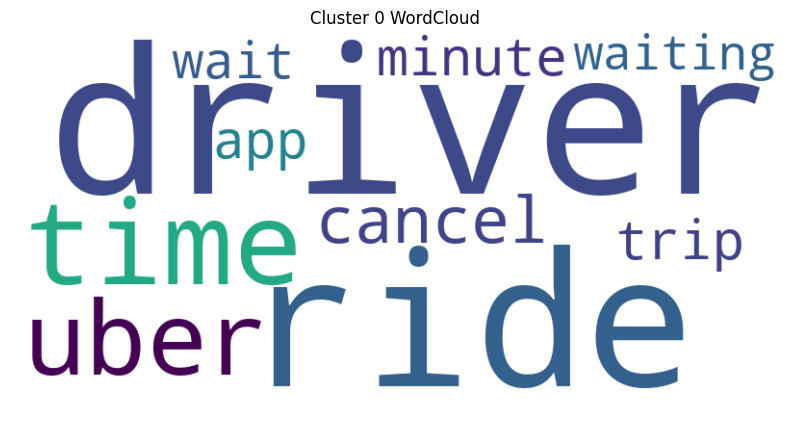

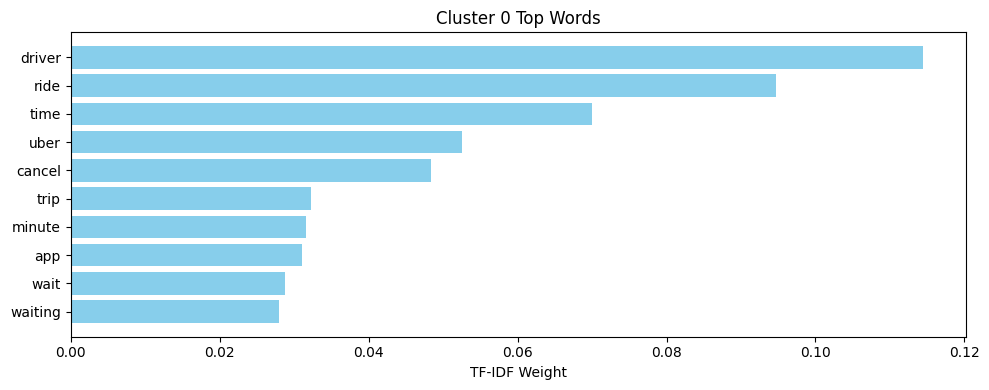


Cluster 1:
uber, app, service, bad, customer, price, use, support, dont, driver


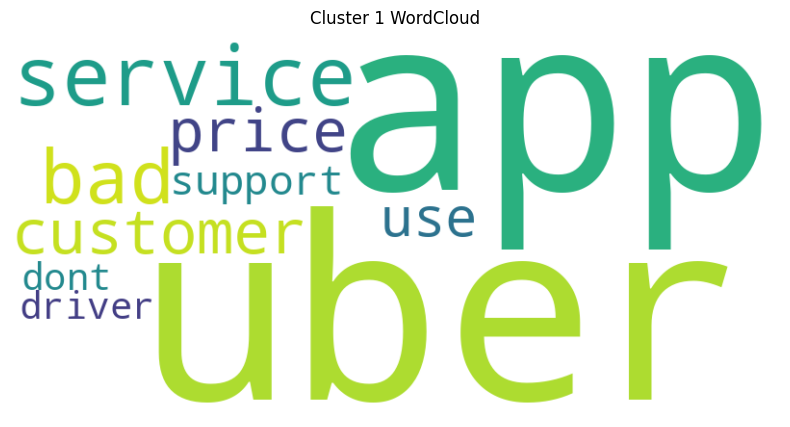

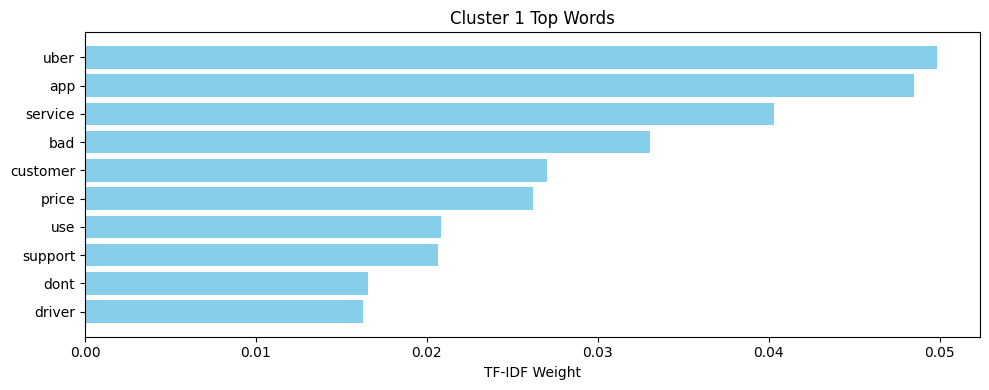


Cluster 2:
worst, worst app, app, worst experience, experience, worst service, driver, time, ride, service


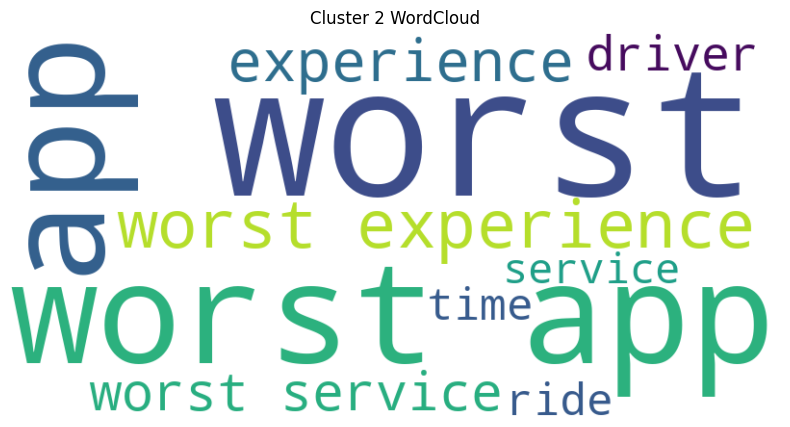

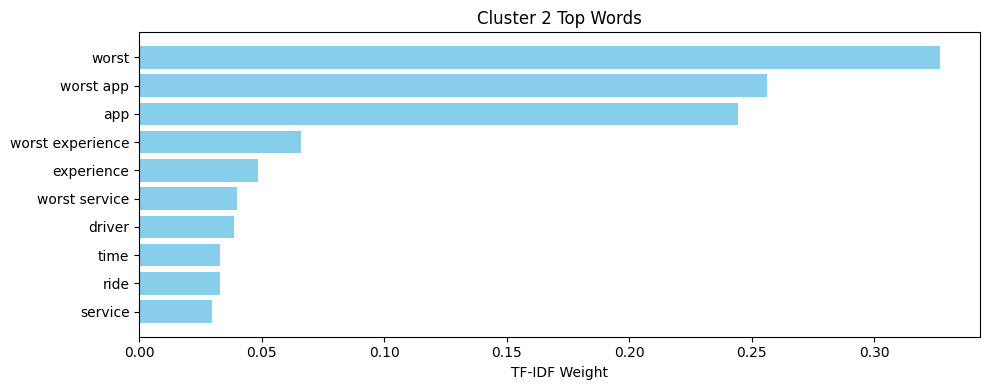

In [109]:
plot_cluster_top_words(kmeans_neg, vectorizer_neg)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Positive Reviews WordCloud </h1>


Cluster 0:
easy, use, easy use, quick, use app, app, convenient, quick easy, app easy, great


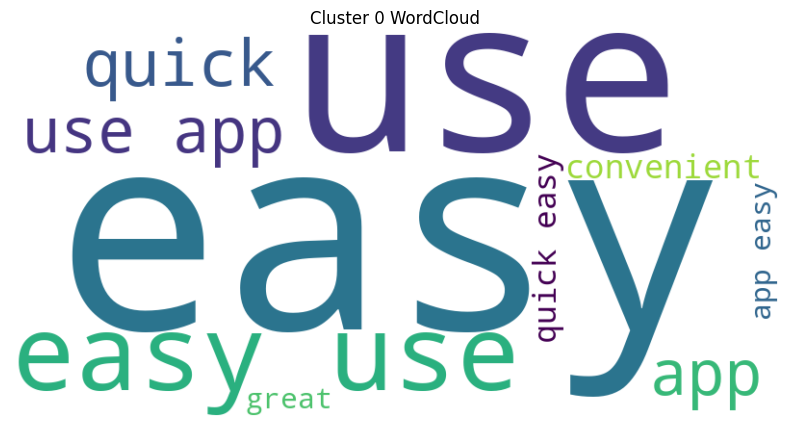

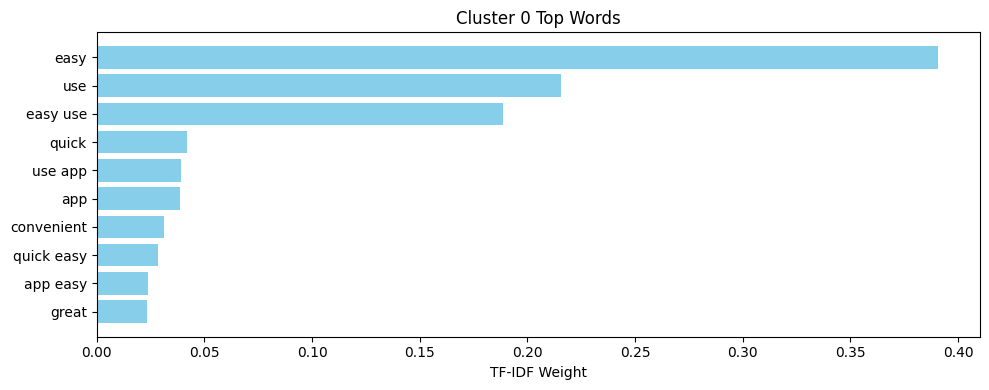


Cluster 1:
nice, driver, good, great, service, app, ride, best, uber, excellent


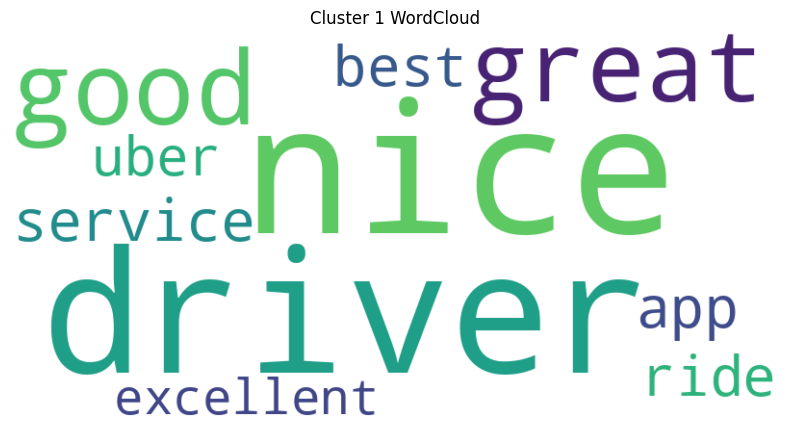

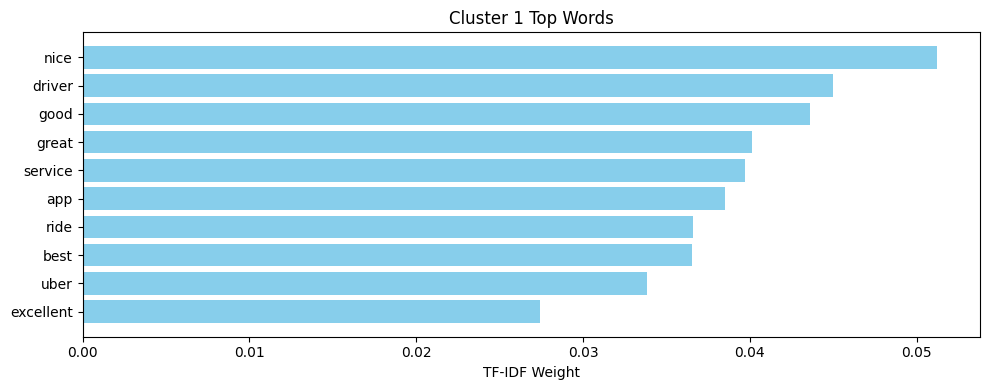


Cluster 2:
good, good service, service, good experience, experience, good app, app, service good, service uber, app good


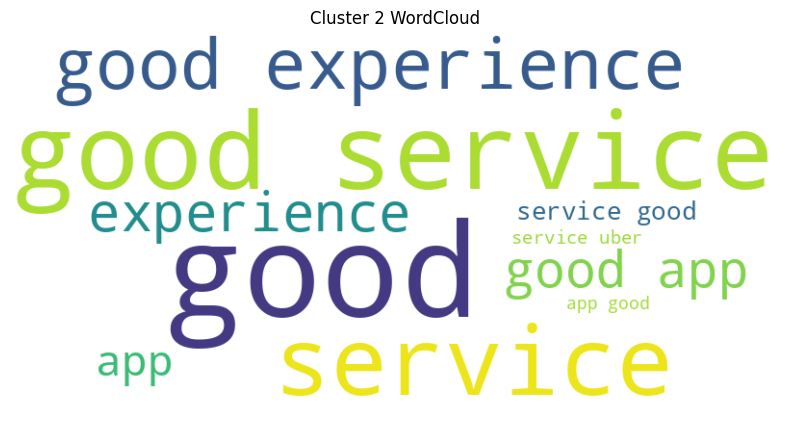

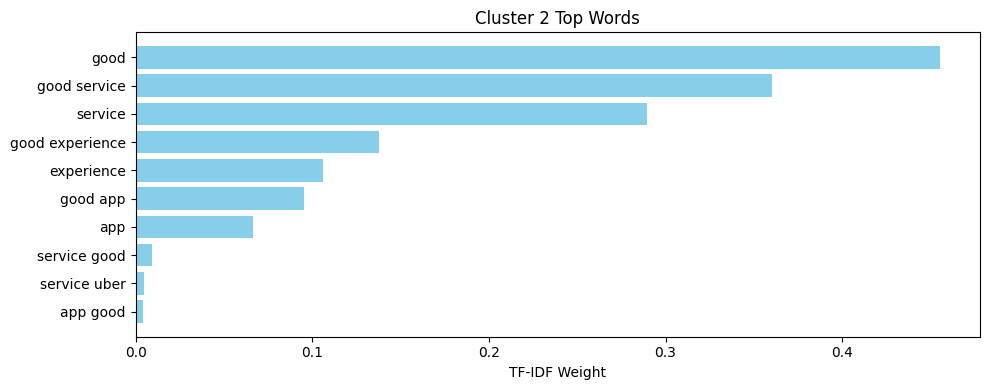

In [110]:
plot_cluster_top_words(kmeans_pos, vectorizer_pos)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Classification & Prediction </h1>

In [111]:
# Convert scores into binary: 1 = positive (4 or 5), 0 = negative (1 to 3)
df.loc[:,'label'] = df['score'].apply(lambda x: 1 if x >= 4 else 0)

# Define features and labels
X = df['content']
y = df['label']

In [112]:
# Split and vectorize the text
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [113]:
# Train a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.85      0.88       634
           1       0.95      0.97      0.96      1766

    accuracy                           0.94      2400
   macro avg       0.93      0.91      0.92      2400
weighted avg       0.94      0.94      0.94      2400



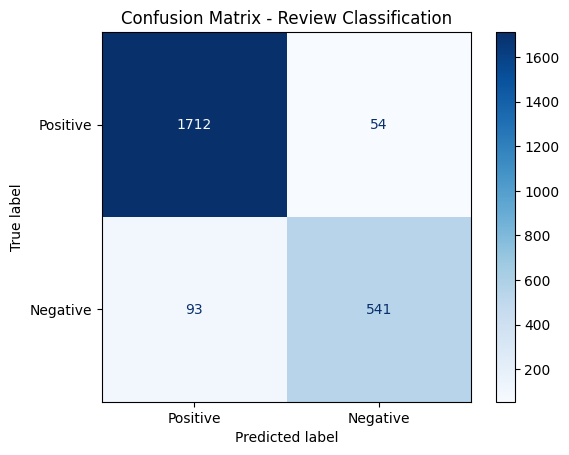

In [114]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])

disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Review Classification')
plt.show()


In [115]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 93.88%


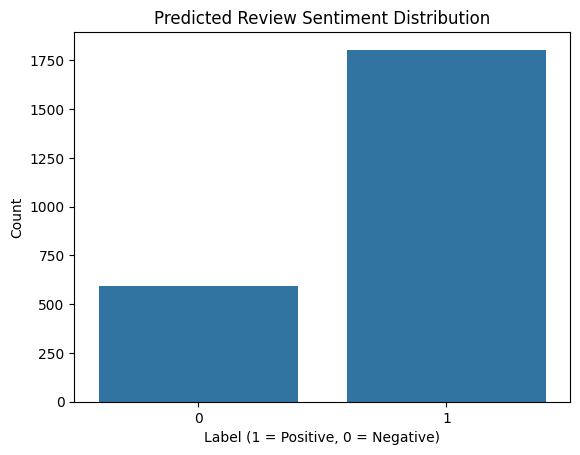

In [116]:
import seaborn as sns

# Visualize predicted class distribution
sns.countplot(x=y_pred)
plt.title("Predicted Review Sentiment Distribution")
plt.xlabel("Label (1 = Positive, 0 = Negative)")
plt.ylabel("Count")
plt.show()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Recommendations </h1>

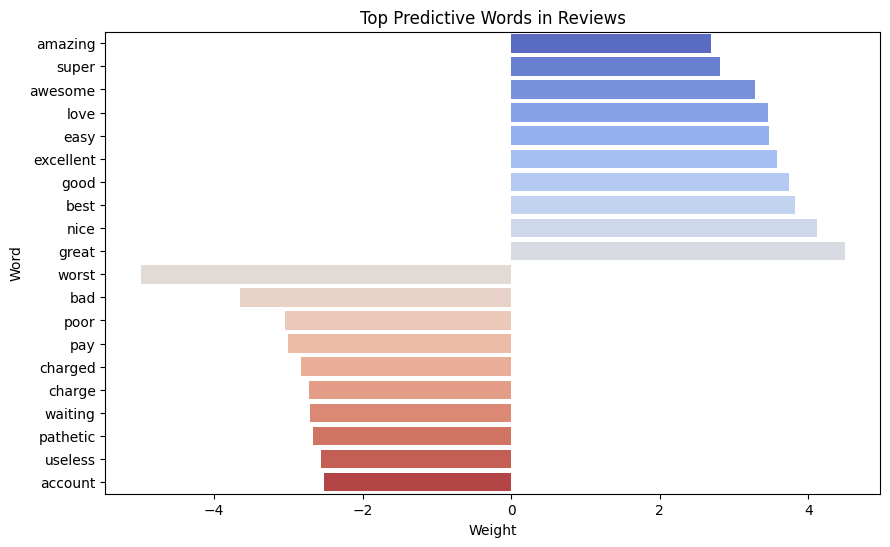

In [117]:
import numpy as np

# Get feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_[0]

# Top 10 positive and negative indicative words
top_positive_indices = np.argsort(coefs)[-10:]
top_negative_indices = np.argsort(coefs)[:10]

top_features = [(feature_names[i], coefs[i]) for i in top_positive_indices]
bottom_features = [(feature_names[i], coefs[i]) for i in top_negative_indices]

# Plotting
top_words = pd.DataFrame(top_features + bottom_features, columns=['Word', 'Weight'])

plt.figure(figsize=(10, 6))
sns.barplot(data=top_words, x='Weight', y='Word', hue='Word', dodge=False, palette='coolwarm', legend=False)
plt.title('Top Predictive Words in Reviews')
plt.show()

**Recommenations and Next Steps**

The above analysis provides insights into both the positive and negative reviews from the Uber app. Below are recommendations for Uber:

1: Use positive words in promotional activities

Positive words found in the top predictive words in reviews include: amazing, easy app, good service, etc. These words can be used in Uber's marketing efforts to promote the service, the positive and seamless ride experience and attract new users.

2: Reward Top Drivers

Driver's who's reviews include the top positive words can receive bonuses, or be offered to join a loyalty program. Also, when user's ride with these driver's they can receive a notifcation that they are driving with a 'top driver'.

3: Correct Billing Issues

Based on the negative words, 'pay' and 'charge' are quite common. This demonstrates that issues with payment on the app are frequent. Therefore, Uber should further explore their payment system and fix the issues as they are contributing to negative reviews and frusterating customers. Resolving these payment issues can allow for Uber users to have a more satisfactory experience.

4: Greater Accuracy with Waittimes

The Uber app currently shows users how long they will need to wait before their driver arrives. Words such as 'waiting' and 'time' are found in negative reviews which proves that customers are not satified with the waitimes. Therefore, Uber can invest and develop higher accuracy for waittimes on their app. This means users can know what to expect from the beginning, and not have thier waittime constantly getting longer.

5: Train AI assistants using sentiment labels

When developing chatbots for customer support, Uber can use the sentiment labels to train them and provide more accurate answers to users. This can also help Uber differentiate between urgent and less urgent support tickets.

6: Add a dropdown menu of common complaints after star rating

After a ride, users can provide a star rating and then leave a review if they would like. Yet, oftentimes the reviews are only one word and do not provide a lot of context. Therefore, if someone rates the ride 1 or 2 stars there can be a drop down menu with common compaints relating to the driver, waititmes, payment, etc. This way users will not have to type out detailed reviews if they do not want to while Uber can still collect the data and create solutions.

7: Monitor appVersion to fix bugs

The dataset consists of appVersion therefore Uber should monitor if past appVersions have more negative reviews. This will allow them to fix bugs with older versions.

